![LogoUC3M](https://www.fundacion.uc3m.es/wp-content/uploads/2018/11/Logo-UC3M-nuevo.png)

### Aprendizaje Automático · Grado en Ingeniería Informática · Curso 2022/23
---
# **Cuaderno 1** - Práctica 1: Predicción de la producción de energía
***Grupo Reducido 82 - Grupo de laboratorio 13***






# **Carga de datos**


Para comenzar, importaremos las librerías que necesitamos:

+ `linear-tree`: Implementación de los modelos de árboles.
+ `statsmodels`: Para los intervalos de confianza.


In [17]:
!pip install --upgrade linear-tree
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Una vez instaladas las bibliotecas necesarias, importamos **Numpy** y **Pandas** ya que los necesitaremos para el desarrollo de la práctica.
Destacar que nos referiremos a **Numpy** como *np* y a **Pandas** como *pd* por simplicidad.

In [18]:
import numpy as np
import pandas as pd

A continuación, cargaremos los datos necesarios. Dado que somos el grupo 13, usaremos los dos conjuntos de datos correspondientes.</br></br>
Por una parte, tenemos los **datos disponibles**, que nos servirán para entrenar, 
evaluar y construir el modelo final y por otra parte los **datos de competición** sobre los que usaremos el modelo final para hacer las predicciones correspondientes.</br></br>

In [19]:
# Datos disponibles.
disp_df = pd.read_csv("disp_st13ns1.txt.bz2",
                      compression="bz2",
                      index_col=0)

# Datos competición.
comp_df = pd.read_csv("comp_st13ns1.txt.bz2",
                      compression="bz2",
                      index_col=0)

# Mostramos la información de cada conjunto de datos.
print(f"El conjunto de datos disponibles tiene {len(disp_df)} instancias.")
print(f"El conjunto de datos de competición tiene {len(disp_df)} instancias.")

El conjunto de datos disponibles tiene 4380 instancias.

El conjunto de datos de competición tiene 4380 instancias.

A continuación, separamos la **matriz de atributos** (**X**) y el **vector de la variable de respuesta** *salida* (**y**).

In [20]:
# Datos.
X = disp_df.drop('salida', axis=1)

# Etiquetas.
y = disp_df.salida

También, definiremos las funciones auxiliares que nos ayudarán a evaluar nuestro desarrollo.

In [21]:
from sklearn import metrics

def mse (y_test, y_test_pred):
    '''Mean squared error.'''
    return metrics.mean_squared_error(y_test, y_test_pred)

def rmse (y_test, y_test_pred):
    '''Root mean squared error.'''
    return np.sqrt(mse(y_test, y_test_pred))

def mae (y_test, y_test_pred):
    '''Mean absolute error.'''
    return metrics.mean_absolute_error(y_test, y_test_pred)

Adicionalmente vamos a usar la biblioteca rich que nos permite mostrar las salidas por consola de manera más clara.

In [22]:
from rich import print

# **Análisis Exploratorio de Datos (EDA)**

*   Elemento de lista
*   Elemento de lista


Antes de comenzar, destacar que dado que los resultados deben ser reproducibles, hemos fijado la **semilla de números aleatorios** en los lugares adecuados. Para ello, hemos seleccionado como semilla el número del grupo de prácticas (*13*).</br></br>
Para poder realizar el análisis exploratorio de datos, llevaremos a cabo los siguientes pasos:

+ Número de instancias y atributos.
+ Tipo de atributos (numéricos o categóricos).
+ Missing values.
+ Tipo de problema (clasificación o regresión).


### **Número de instancias y atributos**
Los **datos disponibles** cuentan con 75 atributos y la variable de respuesta *salida*. Contiene 12 años de datos considerando una instancia por día y todos los años de 365 días. Por tanto, contamos con un total de **4380 instancias**.</br></br>

Los **datos de competición** cuentan con las mismas 75 variables de entrada que los datos disponibles y se trata de un conjunto con 2 años de datos y una instancia por día. En este caso, no se proporciona la variable de respuesta salida, dado que usaremos nuestro modelo final para hacer predicciones sobre estos datos como ya hemos indicado antes. Por tanto, contamos con un total de **733 instancias**.</br></br>

A continuación, profundizaremos más en los atributos, su significado y nomenclatura.</br></br>

Como podemos ver en la siguiente tabla, contamos con **15 atributos** diferentes, cada uno de ellos con su respectivo nombre (identificador) y con su unidad concreta. Estos atributos corresponden con **variables meteorológicas** diversas.</br></br>

| Atributo | Descripción | Unidades |
| :- | :- | -: |
| `apcp_sfc` | Precipitación acumulada de 3 horas en la superficie. | $\dfrac{kg}{m^2}$ |
| `dlwrf_sfc` | Promedio de flujo radiativo de onda larga hacia abajo en la superficie. | $\dfrac{W}{m^2}$ |
| `dswrf_sfc` | Promedio de flujo radiativo de onda corta hacia abajo en la superficie. | $\dfrac{W}{m^2}$ |
| `pres_msl` | La presión del aire al nivel medio del mar. | $Pa$ |
| pwat_eatm	 | Agua precipitable sobre toda la profundidad de la atmósfera. | $\dfrac{kg}{m^2}$ |
| `spfh_2m`	 | Humedad específica a 2 m sobre el suelo. | $\dfrac{kg}{kg}$ |
| `tcdc_eatm`	 | Cobertura total de nubes sobre toda la profundidad de la atmósfera. | $\%$ |
| `tcolc_eatm` | Condensado total integrado en la columna sobre toda la atmósfera. | $\dfrac{kg}{m^2}$ |
| `tmax_2m` | Temperatura máxima en las últimas 3 horas a 2 m sobre el suelo. | $K$ |
| `tmin_2m` | Temperatura mínima en las últimas 3 horas a 2 m sobre el suelo. | $K$ |
| `tmp_2m` | Temperatura actual a 2 m sobre el suelo.	| $K$ |
| `tmp_sfc` | Temperatura de la superficie. | $K$ |
| `ulwrf_sfc` | Radiación ascendente de onda larga en la superficie. | $\dfrac{kg}{m^2}$ |
| `ulwrf_tatm` | Radiación ascendente de onda larga en la parte superior de la atmósfera. | $\dfrac{kg}{m^2}$ |
| `uswrf_sfc` | Radiación ascendente de onda corta en la superficie. | $\dfrac{kg}{m^2}$ |

</br>Partiendo de los 15 atributos que podemos observar en la tabla anterior, se indica una variable en los datos para cada uno ellos en 5 momentos del día. Esto es, contamos con:</br></br>

$5\;instantes\;de\;tiempo\;\cdot\;15\;variables\;meteorológicas\;=\;75\;variables\;de\;entrada$

</br>Los instantes de tiempo vienen dados por una numeración del 1 al 5:
+ 1 $\rightarrow$ 12h
+ 2 $\rightarrow$ 15h
+ 3 $\rightarrow$ 18h
+ 4 $\rightarrow$ 21h
+ 5 $\rightarrow$ 24h

</br>Por tanto, cada variable meteorológica aparece en el conjunto de datos 5 veces, una por cada instante de tiempo. El instante de tiempo se indica en el subíndice $i$, donde $i=1,2,3,4,5$. Por ejemplo, $apcp\_sfc_1$ es la variable que indica la precipitación acumulada de 3 horas en la superficie a las 12h (instante de tiempo 1).

## **Tipo de atributos**.
Dentro de los diferentes tipos de atributos de los datos podemos encontrar los categóricos, numéricos u ordinales.</br></br>

En el caso de nuestros datos, podemos ver como claramente todos ellos son **atributos numéricos reales** a excepción de la variable de respuesta *salida*, la cual es un **atributo numérico entero**.</br></br>

Por tanto, dado que todos los datos con los que vamos a tratar son atributos numéricos, no tendremos que transformar ninguna variable categórica en one-hot-encoding, dado que no vamos a lidiar con ninguna variable de este tipo.


In [23]:
# Mostramos todos los datos.
print('Matriz de atributos:\n\n', X)
print('\n\nVector de la variable de respuesta:\n\n', y)

# Mostramos el tipo de dato de una variable meteorológica y de un valor de la variable de respuesta.
print('\nEjemplo de tipo de dato de variable meteorológica:', type(X['apcp_sf1_1'][0]))
print('Ejemplo de tipo de dato de variable de respuesta:', type(y[0]))

Matriz de atributos:

        apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2       0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3       0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4       0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909    0.114545    0.352727    0.882727    1.379091  284.532288   
V4377    0.000909    0.000000    0.000000    0.000000    0.000000  251.460183   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  268.446164   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  268.225686   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  268.385348   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t1_1  \
V1     246.514368  251.629031  264.832217  262.468350  ...  201.425894   
V2     282.460488  297.254822  315.532651  310.292719  ...  230.836691   
V3     215.177840  218.042184  245.620031  246.749223  ...  226.019290   
V4     261.169269  271.857217  258.001828  247.076775  ...  235.784869   
V5     235.563414  243.941731  266.031791  269.572826  ...  231.005317   
...           ...         ...         ...         ...  ...         ...   
V4376  277.760515  293.636938  337.863753  330.097956  ...  236.903184   
V4377  244.463848  248.985195  266.057689  265.432201  ...  244.682028   
V4378  271.475733  274.081410  287.933849  284.624115  ...  239.584692   
V4379  263.890245  271.744013  291.337566  291.260448  ...  270.318764   
V4380  265.254364  271.679615  291.476737  288.541684  ...  247.253002   

       ulwrf_t2_1  ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  \
V1     249.504475  251.942089  258.069677  254.249663         0.0    9.181818   
V2     200.094627  202.663639  196.833872  202.962007         0.0    4.545455   
V3     232.556009  233.298932  211.631876  210.620375         0.0   13.909091   
V4     235.189503  236.216754  244.018491  239.049223         0.0    5.454545   
V5     230.797569  233.680077  252.037280  246.291591         0.0    9.000000   
...           ...         ...         ...         ...         ...         ...   
V4376  236.348444  224.870748  175.644218  190.153040         0.0    6.818182   
V4377  243.310976  248.244164  263.429332  260.205636         0.0   10.000000   
V4378  221.705779  236.372099  273.823583  274.388403         0.0    7.909091   
V4379  257.707263  254.163126  281.832139  277.711556         0.0    9.727273   
V4380  241.352363  245.428872  257.719322  257.394481         0.0    9.000000   

       uswrf_s3_1  uswrf_s4_1  uswrf_s5_1  
V1      49.000000  103.000000   68.000000  
V2      19.000000   47.272727   32.909091  
V3      77.636364  141.090909   90.454545  
V4      28.909091   90.818182   62.636364  
V5      47.181818  102.272727   67.636364  
...           ...         ...         ...  
V4376   28.545455   27.181818   18.727273  
V4377   50.090909  104.545455   68.454545  
V4378   46.909091  102.000000   67.000000  
V4379   48.181818  104.909091   68.818182  
V4380   47.000000   98.636364   64.818182  

[4380 rows x 75 columns]

Vector de la variable de respuesta:

 V1       11119200
V2        5530500
V3        5596200
V4        4360500
V5       10572300
           ...   
V4376     3780900
V4377    11463300
V4378    11071200
V4379    11222700
V4380    10770600
Name: salida, Length: 4380, dtype: int64

Ejemplo de tipo de dato de variable meteorológica: <class 'numpy.float64'>

Ejemplo de tipo de dato de variable de respuesta: <class 'numpy.int64'>

Como se puede comprobar en las dos últimas llamadas realizadas, las variables de respuesta utilizan atributos del tipo `numpy.float64`, siendo estos valores **numéricos reales**. Por otra parte, la variable de respuesta *salida* utiliza valores del tipo `numpy.int64`, siendo estos valores **numéricos enteros**.


### **Missing values**.
A continuación, comprobaremos si existe algún **missing value**. Para ello, tomaremos el dataframe de datos disponibles creado anteriormente y haremos una suma de los posibles missing values existentes.


In [24]:
# Contamos el número de missing values.
disp_df.isnull().values.sum()

0

Como podemos ver en la anterior ejecución, podemos comprobar que **no existe ningún missing value**.

### **Tipo de problema**.
Como hemos podido ver anteriormente mostrando los datos en pantalla, este problema es claramente de **regresión**, dado que tendremos que construir un modelo para realizar **predicción numérica**.

### **Análisis de atributos**.
A continuación, realizaremos un análisis más profundo de los diferentes atributos con los que contamos. Nuestro objetivo aquí es comprobar si existen correlaciones entre las variables y estudiar de forma individual cada uno de ellos para ver su funcionamiento. De esta forma, veremos si podemos prescindir de algún atributo o ajustar los datos para continuar con la práctica.<br><br>

Por tanto, lo que haremos será calcular las medias de los atributos y hacer una matriz para ver la correlación entre las medias. Tras esto, haremos un pequeño análisis de cada atributo por separado en los distintos momentos del día.

In [25]:
variables_meteorologicas = ['apcp_sf', 'dlwrf_s', 'dswrf_s', 'pres_msl', 'pwat_eatm', 'spfh_2m', 'tcdc_eatm', 'tcolc_eatm', 'tmax_2m', 'tmin_2m', 'tmp_2m', 'tmp_sfc', 'ulwrf_sfc', 'ulwrf_tatm', 'uswrf_sfc']

mean_df = disp_df.iloc[:, :-1].groupby(np.arange(len(disp_df.columns)-1)//5, axis=1).mean()
mean_df.columns = [f'{name}_media' for name in variables_meteorologicas]
mean_df['salida'] = disp_df['salida']
print(mean_df)

apcp_sf_media  dlwrf_s_media  dswrf_s_media  pres_msl_media  \
V1          0.000000     260.405510     208.000000   101926.116761   
V2          0.118545     290.926037     120.727273   101249.524290   
V3          0.003455     231.010220     199.163636   101903.130682   
V4          0.001818     255.539082     181.072727   102395.532955   
V5          0.000000     249.072684     208.909091   100978.042614   
...              ...            ...            ...             ...   
V4376       0.546000     304.778290      87.818182   100995.622159   
V4377       0.000182     255.279823     208.000000   101558.770170   
V4378       0.000000     277.312254     204.181818   101256.869886   
V4379       0.000000     277.291592     209.454545   100085.594460   
V4380       0.000000     277.067550     201.636364   101064.356534   

       pwat_eatm_media  spfh_2m_media  tcdc_eatm_media  tcolc_eatm_media  \
V1            9.037209       0.003719         0.000545          0.001400   
V2           13.307411       0.004266         0.191273          0.190598   
V3            7.537060       0.002395         0.044182          0.044753   
V4            7.682174       0.002957         0.020909          0.020873   
V5           11.418779       0.003471         0.022909          0.024125   
...                ...            ...              ...               ...   
V4376        15.797961       0.005098         0.166909          0.167047   
V4377         8.761050       0.004488         0.000364          0.001105   
V4378        10.874096       0.003212         0.010909          0.010509   
V4379         8.664858       0.003496         0.005636          0.006218   
V4380        13.351457       0.004888         0.003636          0.004642   

       tmax_2m_media  tmin_2m_media  tmp_2m_media  tmp_sfc_media  \
V1        282.142500     279.260581    280.762140     280.926701   
V2        281.145418     278.180924    280.261834     280.343105   
V3        273.843006     270.516610    272.261575     273.564470   
V4        276.050982     273.473676    274.785691     275.572847   
V5        279.547464     275.895609    278.966826     278.851663   
...              ...            ...           ...            ...   
V4376     284.109560     281.561513    282.581503     282.738215   
V4377     281.982668     278.152787    280.218207     280.926219   
V4378     285.984576     282.335071    284.929866     284.845908   
V4379     290.105306     285.888011    288.397318     288.028490   
V4380     286.249309     282.517850    284.681485     285.289985   

       ulwrf_sfc_media  ulwrf_tatm_media  uswrf_sfc_media    salida  
V1          354.865220        243.038359        45.836364  11119200  
V2          346.875286        206.678167        20.745455   5530500  
V3          317.495674        222.825297        64.618182   5596200  
V4          329.077006        238.051768        37.563636   4360500  
V5          336.922521        238.762367        45.218182  10572300  
...                ...               ...              ...       ...  
V4376       361.962524        212.783927        16.254545   3780900  
V4377       354.240127        251.974427        46.618182  11463300  
V4378       369.549726        249.174911        44.763636  11071200  
V4379       388.614675        268.346570        46.327273  11222700  
V4380       375.002238        249.829608        43.890909  10770600  

[4380 rows x 16 columns]

Como podemos ver, hemos realizado las medias de los atributos, resultando en un total de 15 columnas además de la variable de salida. A continuación veremos si existen relaciones entre estas variables:

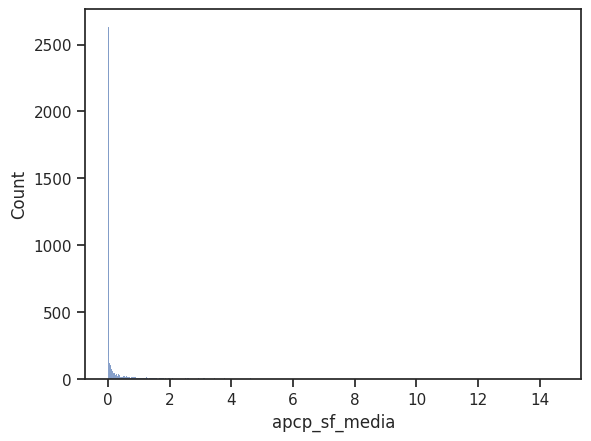

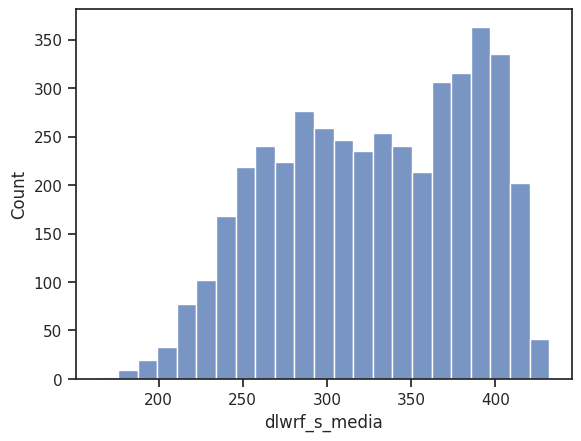

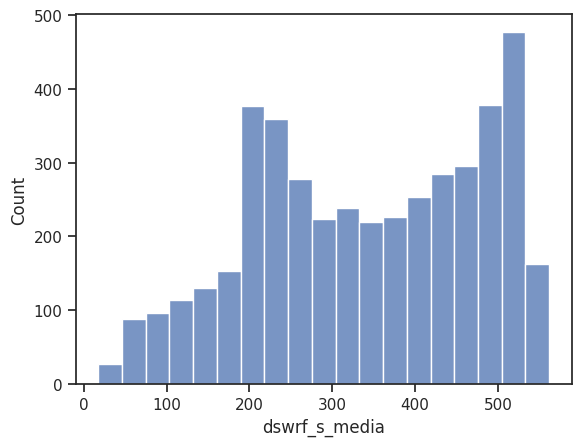

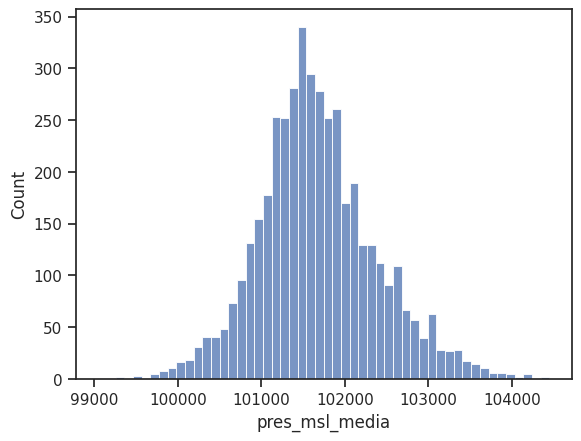

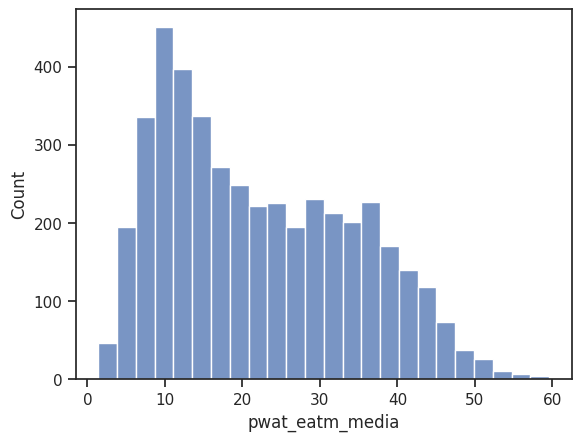

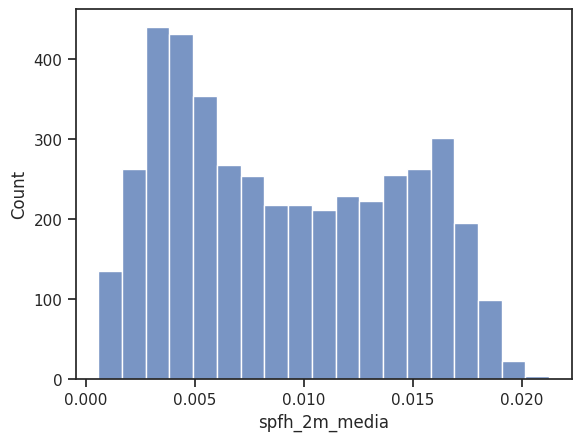

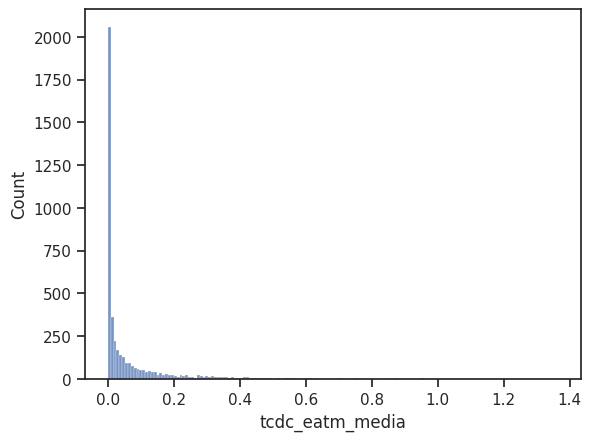

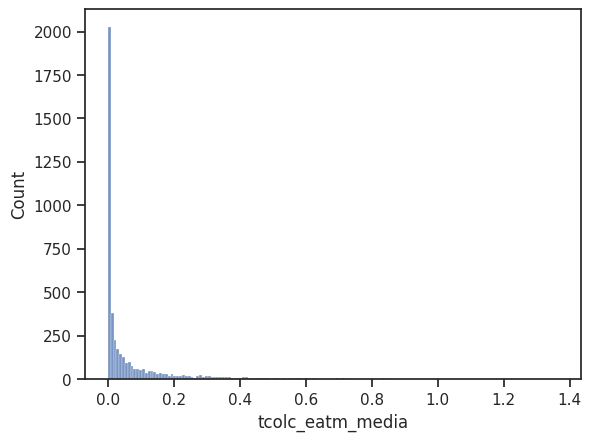

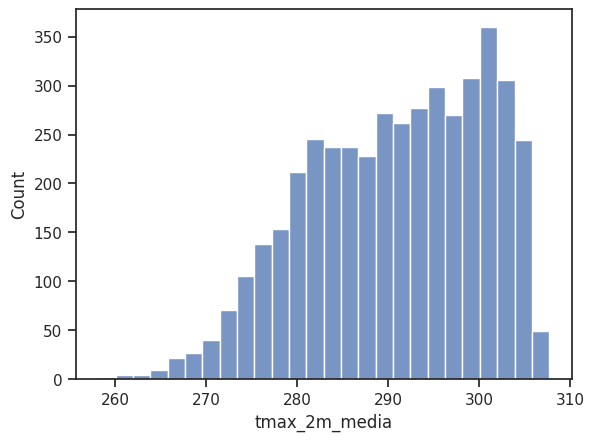

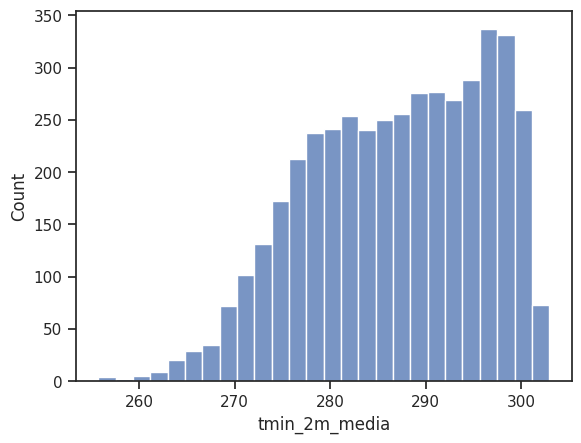

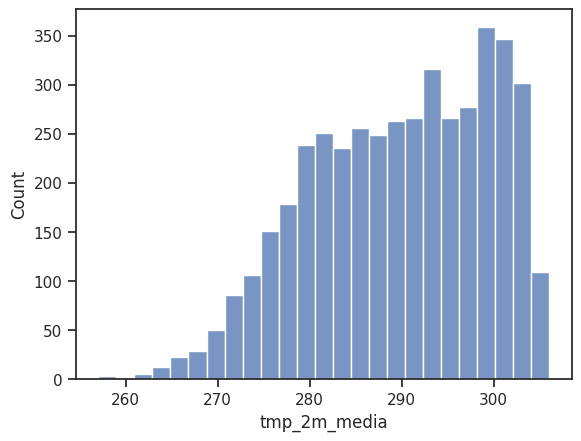

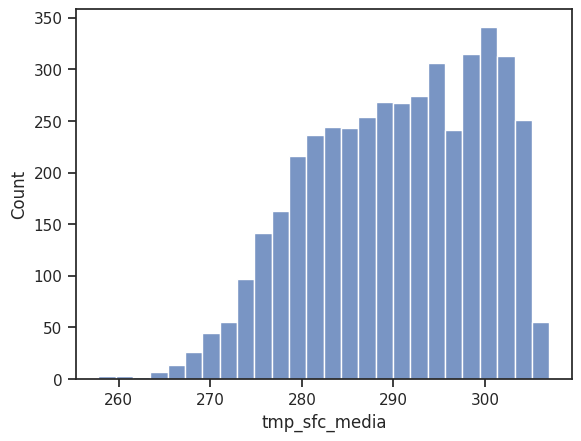

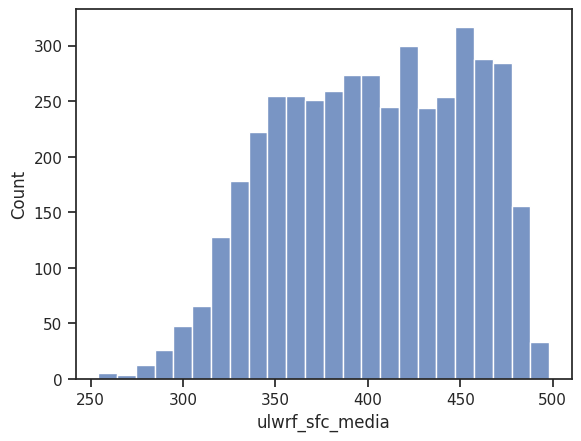

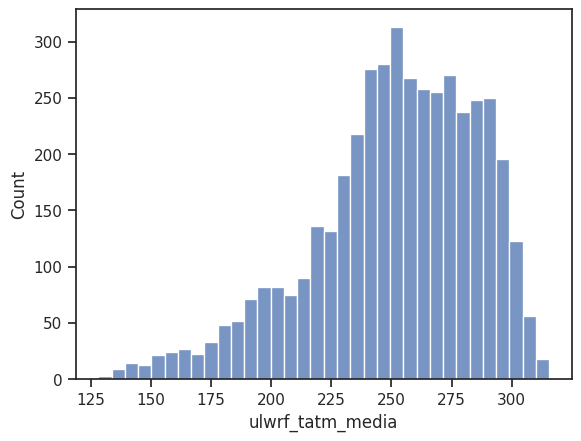

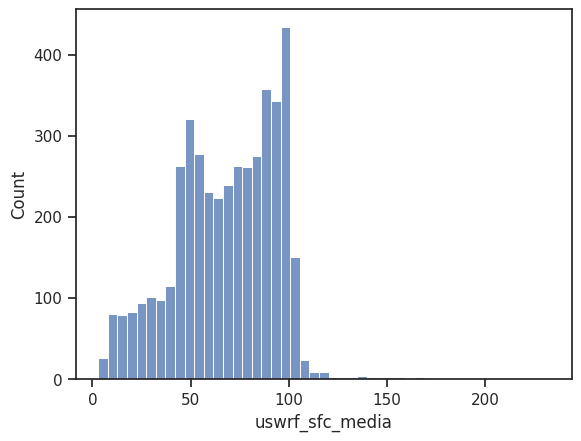

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Seleccionar solo las columnas de las variables meteorológicas
cols = mean_df.columns[:-1]

# Crear un diagrama de cajas para cada variable
for col in cols:
    sns.histplot(data=mean_df, x=col)
    plt.show()

apcp_sf_media  dlwrf_s_media  dswrf_s_media  pres_msl_media  \
apcp_sf_media          1.000000       0.243991      -0.285869       -0.200707   
dlwrf_s_media          0.243991       1.000000       0.420623       -0.591135   
dswrf_s_media         -0.285869       0.420623       1.000000       -0.206957   
pres_msl_media        -0.200707      -0.591135      -0.206957        1.000000   
pwat_eatm_media        0.303863       0.933142       0.376600       -0.470483   
spfh_2m_media          0.161421       0.943544       0.590196       -0.548867   
tcdc_eatm_media        0.728281       0.160995      -0.499665       -0.126575   
tcolc_eatm_media       0.728395       0.161040      -0.499189       -0.126681   
tmax_2m_media          0.023002       0.892888       0.678890       -0.560968   
tmin_2m_media          0.069626       0.927022       0.632265       -0.583072   
tmp_2m_media           0.028554       0.901355       0.679168       -0.565030   
tmp_sfc_media          0.014947       0.892881       0.699562       -0.548523   
ulwrf_sfc_media        0.023213       0.901651       0.689375       -0.540030   
ulwrf_tatm_media      -0.447643       0.269996       0.652529       -0.156953   
uswrf_sfc_media       -0.336084       0.205893       0.893780       -0.038582   
salida                -0.299093       0.317809       0.884782       -0.158127   

                  pwat_eatm_media  spfh_2m_media  tcdc_eatm_media  \
apcp_sf_media            0.303863       0.161421         0.728281   
dlwrf_s_media            0.933142       0.943544         0.160995   
dswrf_s_media            0.376600       0.590196        -0.499665   
pres_msl_media          -0.470483      -0.548867        -0.126575   
pwat_eatm_media          1.000000       0.913353         0.193609   
spfh_2m_media            0.913353       1.000000         0.000085   
tcdc_eatm_media          0.193609       0.000085         1.000000   
tcolc_eatm_media         0.193714       0.000286         0.999994   
tmax_2m_media            0.797623       0.911637        -0.134641   
tmin_2m_media            0.834233       0.932235        -0.076044   
tmp_2m_media             0.808537       0.921180        -0.124369   
tmp_sfc_media            0.803364       0.916693        -0.142202   
ulwrf_sfc_media          0.815189       0.924047        -0.137022   
ulwrf_tatm_media         0.153237       0.387461        -0.699938   
uswrf_sfc_media          0.193559       0.404520        -0.552105   
salida                   0.246283       0.486372        -0.483169   

                  tcolc_eatm_media  tmax_2m_media  tmin_2m_media  \
apcp_sf_media             0.728395       0.023002       0.069626   
dlwrf_s_media             0.161040       0.892888       0.927022   
dswrf_s_media            -0.499189       0.678890       0.632265   
pres_msl_media           -0.126681      -0.560968      -0.583072   
pwat_eatm_media           0.193714       0.797623       0.834233   
spfh_2m_media             0.000286       0.911637       0.932235   
tcdc_eatm_media           0.999994      -0.134641      -0.076044   
tcolc_eatm_media          1.000000      -0.134418      -0.075842   
tmax_2m_media            -0.134418       1.000000       0.993083   
tmin_2m_media            -0.075842       0.993083       1.000000   
tmp_2m_media             -0.124150       0.998566       0.994799   
tmp_sfc_media            -0.141978       0.996680       0.990974   
ulwrf_sfc_media          -0.136791       0.995381       0.992091   
ulwrf_tatm_media         -0.699517       0.541401       0.493801   
uswrf_sfc_media          -0.551585       0.453303       0.400794   
salida                   -0.482646       0.594110       0.545553   

                  tmp_2m_media  tmp_sfc_media  ulwrf_sfc_media  \
apcp_sf_media         0.028554       0.014947         0.023213   
dlwrf_s_media         0.901355       0.892881         0.901651   
dswrf_s_media         0.679168       0.699562         0.689375   
pres_msl_media       -0.565030      -0.548523

<Axes: >

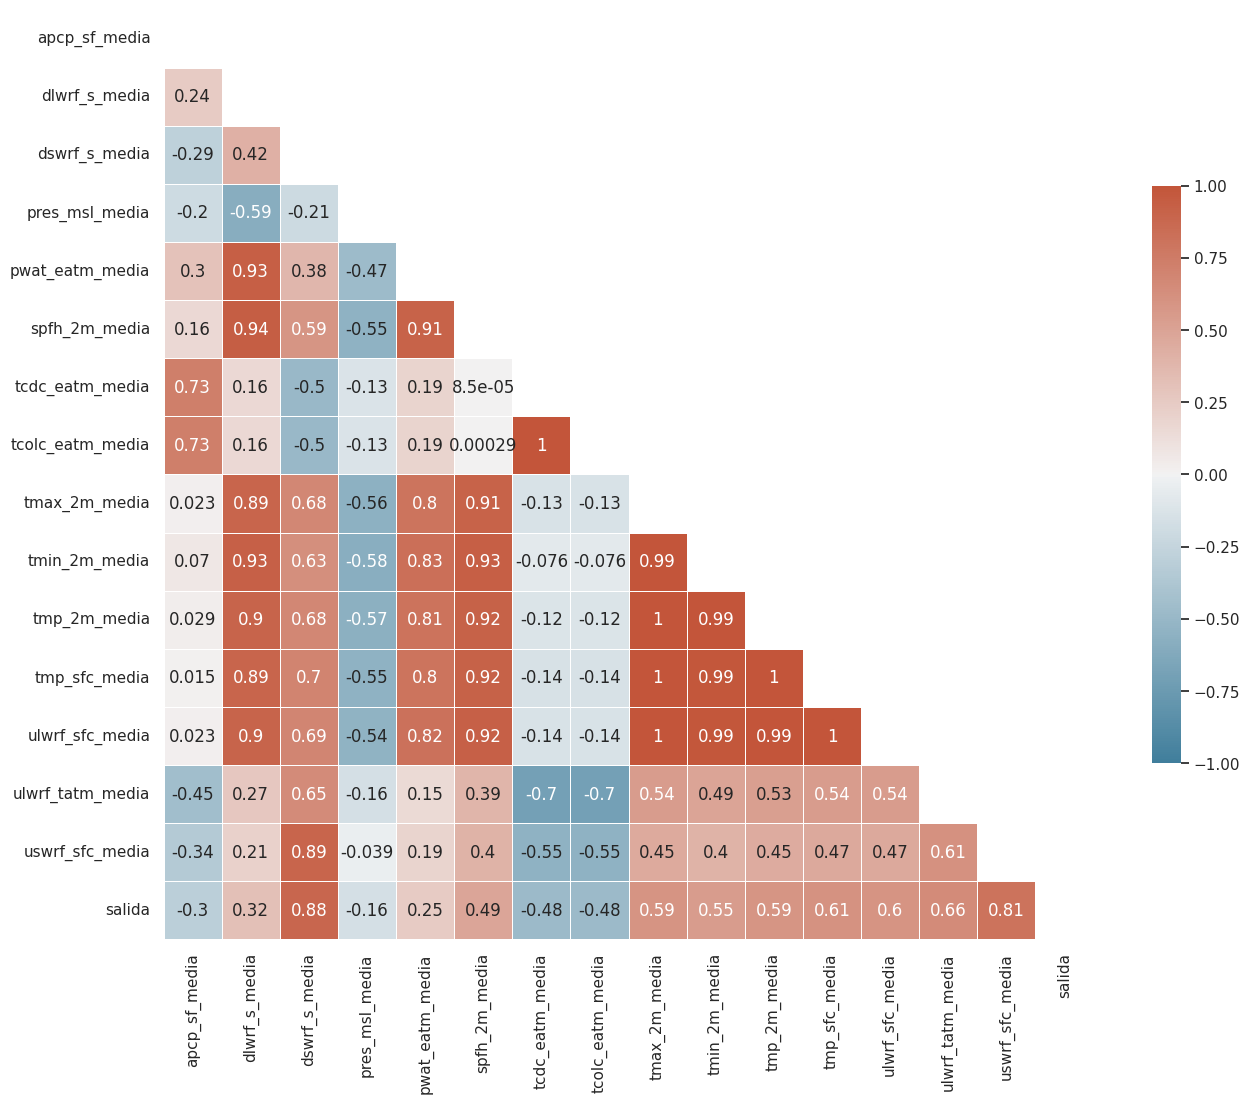

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = mean_df.corr()

print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


##Estudio de correlaciones y mejor predictor##

Si analizamos la correlación de las variables con la salida, podemos observar que los mejores predictores son dswrf_s y uswrf_sfc (siendo el mejor dswrf_s con una correlación de 0.88).

En cuanto a correlaciones entre variables de entrada observamos:
+ uswrf_sfc esta fuertemente correalcionada con dswrf_s, pero no llega a superar el 0.9.
+ ulwrf_sfc está relacionada por encima del 0.9 con dlwrf_s, spfh_2m, tmax_2m, tmin_2m, tmp_2m y tmp_sfc. La correlación supera el 0.99 en los casos de tmax_2m, tmin_2m, tmp_2m y tmp_sfc. 
+ tcolc_eatm y tcdc_eatm tienen una correlación de 1.
+ spfh_2m y dlwrf_s tienen una correlación de 0.94, a su vez spfh_2m y pwat_eatm tienen una correlación de 0.91. Además pwat_eatm y dlwrf_s tienen una correlación de 0.93.

Estrategias:
+ La más clara es eliminar los tmin_2m, tmp_2m, tmp_sfc, tmax_2m, y dejar o bien ulwrf_sfc y dlwrf_s, o bien dejar una de las dos ya que entre ellas están correlacionadas con un 0.9.
+ Podemos observar que lo más lógico sería conservar dlwrf_s ya que está correlacionada con spfh_2m y pwat_eatm y podría represntar también a esas dos. 
+ Por último, debemos eliminar o tcolc_eatm o tcdc_eatm ya que tienen una correlacción de 1.

# **División de datos**
Como se puede ver en el código a continuación, dividiremos los datos de acuerdo con el enunciado establecido. Esto es, utilizaremos los **10 primeros años** del conjunto de datos disponibles para **entrenamiento** (*train*) y los **2 últimos años** para **pruebas** (*test*).</br></br>

Dado que se nos pide que no desordenemos los datos antes de partir en entrenamiento y test para poder respestar el orden temporal, usaremos el parámetro `shuffle = False` al invocar a la función `train_test_split` de Scikit-learn.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Entrenamiento (10 primeros años) y test (2 últimos años).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/12, random_state=13, shuffle=False)

print("Datos de entrenamiento:", X_train.shape, y_train.shape)   # 3650 días -> 10 años.
print("Datos de test:", X_test.shape, y_test.shape)     # 720 días  ->  2 años.

# Normalizamos los datos.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train)
X_test_n = scaler.transform(X_test)

scaler = MinMaxScaler()
scaler.fit(y_train.values.reshape(-1, 1))
y_train_n = scaler.transform(y_train.values.reshape(-1, 1))
y_test_n = scaler.transform(y_test.values.reshape(-1, 1))


Datos de entrenamiento:
(3650, 75)
(3650,)

Datos de test:
(730, 75)
(730,)

Como se puede ver y, como hemos explicado anteriormente, dado que los resultados deben ser reproducibles, hemos fijado la **semilla de números aleatorios** en los lugares adecuados. Para ello, hemos seleccionado como semilla el número del grupo de prácticas (*13*) mediante `random_state = 13`.

# **Métodos Básicos**
Para los modelos básicos, consideraremos los siguientes **métodos básicos**:
+ KNN
+ Árboles de regresión
+ Regresión lineal

Además, destacar que las métricas de evaluación son **RMSE** y **MAE**.

## **Evaluación con hiperparámetros por omisión**

Para este paso haremos una nueva división de datos donde cogeremos los tres ultimos años para test y los 7 primeros para train; dentro de la propia partición train. Esto generará unos nuevos subconjuntos train_test y train_train.

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Volvemos a dividir los datos en entrenamiento y test porque la parttición test solo la usaremos en la evaluación final.
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size=2/10, random_state=13, shuffle=False)

# Dividir también los datos normalizados.
X_train_train_n, X_train_validation_n, y_train_train_n, y_train_validation_n = train_test_split(X_train_n, y_train_n, test_size=2/10, random_state=13, shuffle=False)

# Muestra el tamaño de los datos de entrenamiento y test nuevos.
print('Datos train_train: ' , X_train_train.shape, y_train_train.shape)               # 8 años.
print('Datos train_test: ' , X_train_validation.shape, y_train_validation.shape)  


Datos train_train: 
(2920, 75)
(2920,)

Datos train_test: 
(730, 75)
(730,)

### **KNN**
Primero entrenaremos un KNN con los hiperparametros por omisón y veremos los errores cuadráticos y absolutos medios.

In [30]:
import time

print('\n[bold yellow]KNN\n----[/bold yellow]')

np.random.seed(13)

# [KNN] MODELO BASE.
print('\n[yellow]Modelo base[/yellow]')
base_knn = KNeighborsRegressor()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_knn.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn = end - start
print(f'Tiempo de entrenamiento: {time_knn:.5f} segundos.')

# Imprimimos los hiperparámetros del modelo.
print(f'Hiperparámetros: {base_knn.get_params()}')

# Predicciones del conjunto de test.
y_pred_n = base_knn.predict(X_train_validation_n)

# Denormalizar los datos (aunque se podría RMSE y MAE sin denormalizar).
y_pred = scaler.inverse_transform(y_pred_n)

# Cálculo del error cuadrático medio.
rmse_knn = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_knn}')

# Cálculo del error absoluto medio.
mae_knn = mae(y_train_validation, y_pred)
print(f'MAE: {mae_knn}')

KNN
----

Modelo base

Tiempo de entrenamiento: 0.00123 segundos.

Hiperparámetros: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 
None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

RMSE: 3439946.258953351

MAE: 2478940.87890411

Ahora usamos, PredefinedSplit para usar **validación cruzada** y evaluar nuestro modelo con este método

In [31]:
from sklearn.model_selection import PredefinedSplit, cross_val_score

print('\n[yellow]Modelo validación cruzada[/yellow]')

# Usar predefined split para la validación cruzada.

# Número de días de entrenamiento y test.
N_train = 8 * 365
N_test = 2 * 365

# Crear el selector de validación cruzada.
selector = [-1] * N_train + [0] * N_test

# Crear el objeto PredefinedSplit.
ps = PredefinedSplit(selector)

# Usar el predefined split para la validación cruzada (con medición del tiempo).
cv_knn = KNeighborsRegressor()

start = time.time()
rmse_knn_cv = cross_val_score(cv_knn, X_train_n, y_train_n, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_knn_cv = end - start

start = time.time()
mae_knn_cv = cross_val_score(cv_knn, X_train_n, y_train_n, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_knn_cv = end - start

# Denormalizar los datos.
rmse_knn_cv = scaler.inverse_transform(rmse_knn_cv.reshape(-1, 1)).ravel()
mae_knn_cv = scaler.inverse_transform(mae_knn_cv.reshape(-1, 1)).ravel()

print(f'Tiempo de entrenamiento (RMSE): {time1_knn_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_knn_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_knn_cv.mean()}')
print(f'MAE: {-mae_knn_cv.mean()}')

Modelo validación cruzada

Tiempo de entrenamiento (RMSE): 0.02779 segundos.

Tiempo de entrenamiento (MAE): 0.02292 segundos.

RMSE: 2797346.2589533515

MAE: 1836340.87890411

A continuación, definiremos unos modelos dummy que nos ayudaran a entender la calidad de nuestros modelos.

In [32]:
from sklearn.dummy import DummyRegressor

print('\n[yellow]Modelos dummy[/yellow]')

dummy_1_knn = DummyRegressor(strategy='mean')
dummy_2_knn = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_knn.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_dm1 = end - start

start = time.time()
dummy_2_knn.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_knn_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_knn_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1_n = dummy_1_knn.predict(X_train_validation_n).reshape(-1, 1)
y_pred_dummy_2_n = dummy_2_knn.predict(X_train_validation_n).reshape(-1, 1)

# Denormalizar los datos (aunque se podría RMSE y MAE sin denormalizar).
y_pred_dummy_1 = scaler.inverse_transform(y_pred_dummy_1_n)
y_pred_dummy_2 = scaler.inverse_transform(y_pred_dummy_2_n)

# Cálculo del error cuadrático medio.
rmse_knn_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_knn_dm2 = rmse(y_train_validation, y_pred_dummy_2)
print(f'\nRMSE (mean): {rmse_knn_dm1}')
print(f'RMSE (median): {rmse_knn_dm2}')

# Cálculo del error absoluto medio.
mae_knn_dm1 = mae(y_train_validation, y_pred_dummy_1)
mae_knn_dm2 = mae(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_knn_dm1}')
print(f'MAE (median): {mae_knn_dm2}')

# Relación entre el error del modelo y el error de los modelos dummy.
print(f'\nRMSE dummy (mean)/RMSE KNN: {rmse_knn_dm1/rmse_knn}')
print(f'RMSE dummy (median)/RMSE KNN: {rmse_knn_dm2/rmse_knn}')
print(f'MAE dummy (mean)/MAE KNN: {mae_knn_dm1/mae_knn}')
print(f'MAE dummy (median)/MAE KNN: {mae_knn_dm2/mae_knn}')


Modelos dummy

Tiempo de entrenamiento (mean): 0.00161 segundos.

Tiempo de entrenamiento (median): 0.00065 segundos.

RMSE (mean): 8090772.734467536

RMSE (median): 8103095.185267594

MAE (mean): 7052470.932677802

MAE (median): 7057673.424657534

RMSE dummy (mean)/RMSE KNN: 2.3520055621244675

RMSE dummy (median)/RMSE KNN: 2.3555877258771676

MAE dummy (mean)/MAE KNN: 2.8449532591497535

MAE dummy (median)/MAE KNN: 2.8470519344445155

### **Árboles de regresión**

Primero entrenaremos un árbol de decisión con los hiperparametros por omisón y veremos los errores cuadráticos y absolutos medios.

In [33]:
print('\n[bold yellow]Árbol de decisión\n------------------[/bold yellow]')

# [Árbol de decisión] MODELO BASE.
print('\n[yellow]Modelo base[/yellow]')
base_tree = DecisionTreeRegressor()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_tree.fit(X_train_train, y_train_train)
end = time.time()
time_tree = end - start
print(f'Tiempo de entrenamiento: {time_tree:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred = base_tree.predict(X_train_validation)

# Cálculo del error cuadrático medio.
rmse_tree = rmse(y_train_validation, y_pred)
print(f'\nError cuadrático medio del modelo Árbol de decisión: {rmse_tree}')

# Cálculo del error absoluto medio.
mae_tree = mae(y_train_validation, y_pred)
print(f'Error absoluto medio del modelo Árbol de decisión: {mae_tree}')



Árbol de decisión
------------------

Modelo base

Tiempo de entrenamiento: 0.25849 segundos.

Error cuadrático medio del modelo Árbol de decisión: 4569076.711874634

Error absoluto medio del modelo Árbol de decisión: 3170312.5150684933

Ahora usamos, PredefinedSplit para usar **validación cruzada** y evaluar nuestro modelo con este método

In [34]:
print('\n[yellow]Modelo validación cruzada[/yellow]')

# Usar predefined split para la validación cruzada.

'''
print(ps.get_n_splits(X))

for train, valid in ps.split(X):
    print(f'Size of the train set: {train.shape}')
    print(f'Size of the valid set: {valid.shape}')
    print(f'Indices of the train set: {train}')
    print(f'Indices of the valid set: {valid}')
'''

# Usar el predefined split para la validación cruzada (con medición del tiempo).
cv_tree = DecisionTreeRegressor()

start = time.time()
rmse_tree_cv = cross_val_score(cv_tree, X_train, y_train, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_tree_cv = end - start

start = time.time()
mae_tree_cv = cross_val_score(cv_tree, X_train, y_train, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_tree_cv = end - start


print(f'Tiempo de entrenamiento: {time1_tree_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento: {time2_tree_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_tree_cv.mean()}')
print(f'MAE: {-mae_tree_cv.mean()}')


Modelo validación cruzada

Tiempo de entrenamiento: 0.24295 segundos.

Tiempo de entrenamiento: 0.24165 segundos.

RMSE: 4440967.302640197

MAE: 3223703.419178082

A continuación, compararemos nuestro árbol de decisión con unos modelos dummy con estrategias de media y mediana.

In [35]:
print('\n[yellow]Modelos dummy[/yellow]')
dummy_1_tree = DummyRegressor(strategy='mean')
dummy_2_tree = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_tree.fit(X_train_train, y_train_train)
end = time.time()
time_tree_dm1 = end - start

start = time.time()
dummy_2_tree.fit(X_train_train, y_train_train)
end = time.time()
time_tree_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_tree_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_tree_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1 = dummy_1_tree.predict(X_train_validation)
y_pred_dummy_2 = dummy_2_tree.predict(X_train_validation)

# Cálculo del error cuadrático medio.
rmse_tree_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_tree_dm2 = rmse(y_train_validation, y_pred_dummy_2)  
print(f'\nRMSE (mean): {rmse_tree_dm1}')
print(f'RMSE (median): {rmse_tree_dm2}')

# Cálculo del error absoluto medio.
mae_tree_dm1 = mae(y_train_validation, y_pred_dummy_1)
mae_tree_dm2 = mae(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_tree_dm1}')
print(f'MAE (median): {mae_tree_dm2}')

# Relación entre el error del modelo y el error de los modelos dummy.
print(f'\nRMSE dummy (mean)/RMSE tree: {rmse_tree_dm1/rmse_tree}')
print(f'RMSE dummy (median)/RMSE tree: {rmse_tree_dm2/rmse_tree}')
print(f'MAE dummy (mean)/MAE tree: {mae_tree_dm1/mae_tree}')
print(f'MAE dummy (median)/MAE tree: {mae_tree_dm2/mae_tree}')


Modelos dummy

Tiempo de entrenamiento (mean): 0.00072 segundos.

Tiempo de entrenamiento (median): 0.00104 segundos.

RMSE (mean): 8090772.734467536

RMSE (median): 8103095.185267594

MAE (mean): 7052470.932677801

MAE (median): 7057673.424657534

RMSE dummy (mean)/RMSE tree: 1.7707675411621608

RMSE dummy (median)/RMSE tree: 1.7734644647590074

MAE dummy (mean)/MAE tree: 2.2245349312275717

MAE dummy (median)/MAE tree: 2.2261759341113585

### **Regresión lineal**

Primero entrenaremos un modelo de regresión lineal con los hiperparametros por omisón y veremos los errores cuadráticos y absolutos medios.

In [36]:
print('\n[bold yellow]Regresión lineal\n------------------[/bold yellow]')

# [Regresión lineal] MODELO BASE.
print('\n[yellow]Modelo base[/yellow]')
base_linear = LinearRegression()

# Entrenamiento (con medición del tiempo).
start = time.time()
base_linear.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear = end - start
print(f'Tiempo de entrenamiento: {time_linear:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_n = base_linear.predict(X_train_validation_n)

# Denormalizar los datos.
y_pred = scaler.inverse_transform(y_pred_n)

# Cálculo del error cuadrático medio.
rmse_linear = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear}')

# Cálculo del error absoluto medio.
mae_linear = mae(y_train_validation, y_pred)
print(f'MAE: {mae_linear}')

Regresión lineal
------------------

Modelo base

Tiempo de entrenamiento: 0.05920 segundos.

RMSE: 2914992.7582885786

MAE: 2143275.4134048363

Ahora usamos, PredefinedSplit para usar **validación cruzada** y evaluar nuestro modelo con este método

In [37]:
print('\n[yellow]Modelo validación cruzada[/yellow]')

'''
print(ps.get_n_splits(X))

for train, valid in ps.split(X):
    print(f'Size of the train set: {train.shape}')
    print(f'Size of the valid set: {valid.shape}')
    print(f'Indices of the train set: {train}')
    print(f'Indices of the valid set: {valid}')
'''

# Usar el predefined split para la validación cruzada.
cv_linear = LinearRegression()

start = time.time()
rmse_linear_cv = cross_val_score(cv_linear, X_train_n, y_train_n, cv=ps, scoring='neg_root_mean_squared_error')
end = time.time()
time1_linear_cv = end - start

start = time.time()
mae_linear_cv = cross_val_score(cv_linear, X_train_n, y_train_n, cv=ps, scoring='neg_mean_absolute_error')
end = time.time()
time2_linear_cv = end - start

# Denormalizar los datos.
rmse_linear_cv = scaler.inverse_transform(rmse_linear_cv.reshape(-1, 1)).ravel()
mae_linear_cv = scaler.inverse_transform(mae_linear_cv.reshape(-1, 1)).ravel()

print(f'Tiempo de entrenamiento (RMSE): {time1_linear_cv:.5f} segundos.')
print(f'Tiempo de entrenamiento (MAE): {time2_linear_cv:.5f} segundos.')
print(f'\nRMSE: {-rmse_linear_cv.mean()}')
print(f'RMSE: {-mae_linear_cv.mean()}')


Modelo validación cruzada

Tiempo de entrenamiento (RMSE): 0.03386 segundos.

Tiempo de entrenamiento (MAE): 0.03831 segundos.

RMSE: 2272392.7582885786

RMSE: 1500675.413404837

A continuación, compararemos nuestro árbol de decisión con unos modelos dummy con estrategias de media y mediana.

In [38]:
print('\n[yellow]Modelos dummy[/yellow]')
dummy_1_linear = DummyRegressor(strategy='mean')
dummy_2_linear = DummyRegressor(strategy='median')

# Entrenamiento de los modelos dummy (con medición del tiempo).
start = time.time()
dummy_1_linear.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_dm1 = end - start

start = time.time()
dummy_2_linear.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_dm2 = end - start

print(f'Tiempo de entrenamiento (mean): {time_linear_dm1:.5f} segundos.')
print(f'Tiempo de entrenamiento (median): {time_linear_dm2:.5f} segundos.')

# Predicciones del conjunto de test.
y_pred_dummy_1_n = dummy_1_linear.predict(X_train_validation_n).reshape(-1, 1)
y_pred_dummy_2_n = dummy_2_linear.predict(X_train_validation_n).reshape(-1, 1)

# Denormalizar los datos.
y_pred_dummy_1 = scaler.inverse_transform(y_pred_dummy_1_n)
y_pred_dummy_2 = scaler.inverse_transform(y_pred_dummy_2_n)

# Cálculo del error cuadrático medio.
rmse_linear_dm1 = rmse(y_train_validation, y_pred_dummy_1)
rmse_linear_dm2 = rmse(y_train_validation, y_pred_dummy_2)
print(f'\nRMSE (mean): {rmse_linear_dm1}')
print(f'RMSE (median): {rmse_linear_dm2}')

# Cálculo del error absoluto medio.
mae_linear_dm1 = mae(y_train_validation, y_pred_dummy_1)
mae_linear_dm2 = mae(y_train_validation, y_pred_dummy_2)
print(f'MAE (mean): {mae_linear_dm1}')
print(f'MAE (median): {mae_linear_dm2}')

# Cálculo de la diferencia entre el error de los modelos dummy y el modelo base.
print(f'\nRMSE dummy (mean)/RMSE linear: {rmse_linear_dm1/rmse_linear}')
print(f'RMSE dummy (median)/RMSE linear: {rmse_linear_dm2/rmse_linear}')
print(f'MAE dummy (mean)/MAE linear: {mae_linear_dm1/mae_linear}')
print(f'MAE dummy (median)/MAE linear: {mae_linear_dm2/mae_linear}')


Modelos dummy

Tiempo de entrenamiento (mean): 0.00223 segundos.

Tiempo de entrenamiento (median): 0.00298 segundos.

RMSE (mean): 8090772.734467536

RMSE (median): 8103095.185267594

MAE (mean): 7052470.932677802

MAE (median): 7057673.424657534

RMSE dummy (mean)/RMSE linear: 2.77557215586968

RMSE dummy (median)/RMSE linear: 2.779799422220521

MAE dummy (mean)/MAE linear: 3.290510817494123

MAE dummy (median)/MAE linear: 3.292938173281995

## **Ajuste de hiperparámetros**

En este paso, utilizaremos el Predefined Split para hacer GridSearch en los diferentes métodos y encontrar los mejores hiperparametros para cada modelo. Además, utilizaremos RandomSearch y seleccionaremos el que tenga menos MAE. Utilizar RamdomSearch nos servirá para poder introducir mayores cantidades de hiperparametros a evaluar sin resentir el tiempo de ejecución, eventualmente encontraremos mejores resultados utilizando esta técnica.

### **KNN**

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

print('\n[bold blue]KNN\n----[/bold blue]')

print('\n[yellow]Grid Search[/yellow]\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': [1, 2, 5, 10, 20, 30, 40],
    'p':[1, 2]
}

# Definimos el modelo.
model = KNeighborsRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(X_train_n, y_train_n)
end = time.time()
time_knn_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_knn_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=grid_result.best_params_['n_neighbors'],
                            weights=grid_result.best_params_['weights'],
                            p=grid_result.best_params_['p'],
                            metric=grid_result.best_params_['metric'],
                            leaf_size=grid_result.best_params_['leaf_size'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_knn_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_knn_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_knn_gs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_knn_gs_a}\n')

# Ahora, usaremos randomized search para comparar resultados con grid search.
print('[yellow]Randomized Search[/yellow]\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar (más combinaciones).
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': list(range(1,100)),
    'p':[1, 2]
}

r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=100)


# Entrenamos el randomized search.
start = time.time()
r_search_result = r_search.fit(X_train_n, y_train_n)
end = time.time()
time_knn_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_knn_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=r_search_result.best_params_['n_neighbors'],
                            weights=r_search_result.best_params_['weights'],
                            p=r_search_result.best_params_['p'],
                            metric=r_search_result.best_params_['metric'],
                            leaf_size=r_search_result.best_params_['leaf_size'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_knn_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_knn_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de prueba normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_knn_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_knn_rs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_knn_rs_a}')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_knn_a = min(mae_knn_gs_a, mae_knn_rs_a)

if mae_knn_a == mae_knn_gs_a:
    rmse_knn_a = rmse_knn_gs_a
else:
    rmse_knn_a = rmse_knn_rs_a



KNN
----

Grid Search

Fitting 1 folds for each of 672 candidates, totalling 672 fits


Tiempo búsqueda hiperparámetros (Grid Search): 91.68303 segundos.

Mejores hiperparámetros: {'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00116 segundos.

RMSE: 3349726.2813777477

MAE: 2417221.600297992

Randomized Search

Fitting 1 folds for each of 100 candidates, totalling 100 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 13.29219 segundos.

Mejores hiperparámetros: {'weights': 'distance', 'p': 1, 'n_neighbors': 15, 'metric': 'manhattan', 'leaf_size': 1}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.00237 segundos.

RMSE: 3201786.090578021

MAE: 2328954.693791461

### **Árboles de regresión**

In [40]:
print('\n[bold blue]Árbol de decisión\n------------------[/bold blue]')

print('\n[yellow]Grid Search[/yellow]\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'max_depth': [1, 2, 5, 8, 10, 15, 20, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 5, 8, 10, 15, 20, 40],
}

# Definimos el modelo.
model = DecisionTreeRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(X_train, y_train)
end = time.time()
time_tree_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_tree_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo Árbol de Regresión con los mejores hiperparámetros
model = DecisionTreeRegressor(max_depth=grid_result.best_params_['max_depth'],
                              min_samples_split=grid_result.best_params_['min_samples_split'],
                              min_samples_leaf=grid_result.best_params_['min_samples_leaf'])

# Entrenamos modelo con datos de entrenamiento.
start = time.time()
model.fit(X_train_train, y_train_train)
end = time.time()
time_tree_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_tree_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación.
y_pred = model.predict(X_train_validation)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_tree_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_tree_gs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_tree_gs_a}\n')


# Ahora, usaremos randomized search para comparar resultados con grid search.
print('[yellow]Randomized Search[/yellow]\n')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar (más combinaciones).
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50],
}

# Ahora, usaremos random search para comparar resultados con grid search.
r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=100)

# Entrenamos el grid search.
start = time.time()
r_search_result = r_search.fit(X_train, y_train)
end = time.time()
time_tree_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_tree_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo Árbol de Regresión con los mejores hiperparámetros
model = DecisionTreeRegressor(max_depth=r_search_result.best_params_['max_depth'],
                              min_samples_split=r_search_result.best_params_['min_samples_split'],
                              min_samples_leaf=r_search_result.best_params_['min_samples_leaf'])

# Entrenamos modelo con datos de entrenamiento.
start = time.time()
model.fit(X_train_train, y_train_train)
end = time.time()
time_tree_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_tree_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación.
y_pred = model.predict(X_train_validation)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_tree_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_tree_rs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_tree_rs_a}\n')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_tree_a = min(mae_tree_gs_a, mae_tree_rs_a)

if mae_tree_a == mae_tree_gs_a:
    rmse_tree_a = rmse_tree_gs_a
else:
    rmse_tree_a = rmse_tree_rs_a


Árbol de decisión
------------------

Grid Search

Fitting 1 folds for each of 576 candidates, totalling 576 fits


Tiempo búsqueda hiperparámetros (Grid Search): 56.41862 segundos.

Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 6}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.12502 segundos.

RMSE: 3422340.28546764

MAE: 2470632.610462104

Randomized Search

Fitting 1 folds for each of 100 candidates, totalling 100 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 10.65134 segundos.

Mejores hiperparámetros: {'min_samples_split': 45, 'min_samples_leaf': 30, 'max_depth': 6}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.11252 segundos.

RMSE: 3481927.0752000273

MAE: 2517083.33107137

### **Regresión lineal**

In [41]:
print('\n[bold blue]Regresión lineal\n------------------[/bold blue]')

print('\n[yellow]Grid Search[/yellow]\n')

# Usaremos grid search para encontrar los mejores hiperparámetros haciendo antes predefined split.

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'fit_intercept':  [True, False],
    'positive': [True, False],
}

# Definimos el modelo.
model = LinearRegression()

# Definir la estrategia de validación cruzada
#cv = TimeSeriesSplit(n_splits=3)

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
start = time.time()
grid_result = grid.fit(X_train_n, y_train_n)
end = time.time()
time_linear_gs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Grid Search): {time_linear_gs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo Regresión Linear con los mejores hiperparámetros
model = LinearRegression(fit_intercept=grid_result.best_params_['fit_intercept'],
                         positive=grid_result.best_params_['positive'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_gs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_linear_gs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_gs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear_gs_a}')

# Calcular el error absoluto medio en la escala original.
mae_linear_gs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_linear_gs_a}\n')


# Ahora, usaremos random search para comparar resultados con grid search.
print('[yellow]Randomized Search[/yellow]\n')

# -Usaremos el mismo diccionario de hiperparámetros que en grid search.

r_search = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              cv=ps,
                              scoring='neg_mean_absolute_error',
                              verbose=1,
                              n_jobs=-1,
                              n_iter=4)

# Entrenamos el grid search.
start = time.time()
r_search_result = r_search.fit(X_train_n, y_train_n)
end = time.time()
time_linear_rs = end - start
print(f'\nTiempo búsqueda hiperparámetros (Randomized Search): {time_linear_rs:.5f} segundos.')

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {r_search_result.best_params_}')

# Definir modelo Regresión Linear con los mejores hiperparámetros
model = LinearRegression(fit_intercept=r_search_result.best_params_['fit_intercept'],
                         positive=r_search_result.best_params_['positive'])

# Entrenamos modelo con datos de entrenamiento normalizados.
start = time.time()
model.fit(X_train_train_n, y_train_train_n)
end = time.time()
time_linear_rs_a = end - start
print(f'\nTiempo de entrenamiento (Hiperparámetros ajustados): {time_linear_rs_a:.5f} segundos.')

# Hacer predicciones en los datos de validación normalizados.
y_pred_n = model.predict(X_train_validation_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_rs_a = rmse(y_train_validation, y_pred)
print(f'\nRMSE: {rmse_linear_rs_a}')

# Calcular el error absoluto medio en la escala original.
mae_linear_rs_a = mae(y_train_validation, y_pred)
print(f'MAE: {mae_linear_rs_a}\n')


# Seleccionamos los menore errores (entre grid search y randomized search).
mae_linear_a = min(mae_linear_gs_a, mae_linear_rs_a)

if mae_linear_a == mae_linear_gs_a:
    rsme_linear_a = rmse_linear_gs_a
else:
    rsme_linear_a = rmse_linear_rs_a


Regresión lineal
------------------

Grid Search

Fitting 1 folds for each of 4 candidates, totalling 4 fits


Tiempo búsqueda hiperparámetros (Grid Search): 0.18786 segundos.

Mejores hiperparámetros: {'fit_intercept': True, 'positive': False}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.03293 segundos.

RMSE: 2914992.7582885786

MAE: 2143275.4134048363

Randomized Search

Fitting 1 folds for each of 4 candidates, totalling 4 fits


Tiempo búsqueda hiperparámetros (Randomized Search): 0.23583 segundos.

Mejores hiperparámetros: {'positive': False, 'fit_intercept': True}

Tiempo de entrenamiento (Hiperparámetros ajustados): 0.03118 segundos.

RMSE: 2914992.7582885786

MAE: 2143275.4134048363

## **Comparativa de errores** 

En este apartado, comparamos los errores de los métodos básicos con los hiperparámetros por omisión y con los hiperparámetros ajustados.

In [42]:
print('[bold red]' + '-' * 60 +'\nComparación de modelos simples y resultados.\n' + '-' * 60 + '[/bold red]')

# KNN.
print('\n[bold green]KNN\n----[/bold green]')

print('MAE sin ajustar:', mae_knn)
print('MAE ajustado:', mae_knn_a)
print('MAE ratio KNN/knn_adjusted:', mae_knn/mae_knn_a)
print(f'\nMAE dummy (mean)/MAE KNN: {mae_knn_dm1/mae_knn_a}')
print(f'MAE dummy (median)/MAE KNN: {mae_knn_dm2/mae_knn_a}')

print('\nRMSE sin ajustar:', rmse_knn)
print('RMSE ajustado:', rmse_knn_a)
print('RMSE ratio KNN/knn_adjusted:', rmse_knn/rmse_knn_a)
print(f'\nRMSE dummy (mean)/RMSE KNN: {rmse_knn_dm1/rmse_knn_a}')
print(f'RMSE dummy (median)/RMSE KNN: {rmse_knn_dm2/rmse_knn_a}')


# Arbol de decisión.
print('\n[bold green]Árbol de decisión\n------------------[/bold green]')

print('MAE sin ajustar:', mae_tree)
print('MAE ajustado:', mae_tree_a)
print('MAE ratio tree/tree_adjusted:', mae_tree/mae_tree_a)
print(f'\nMAE dummy (mean)/MAE tree: {mae_tree_dm1/mae_tree_a}')
print(f'MAE dummy (median)/MAE tree: {mae_tree_dm2/mae_tree_a}')

print('\nRMSE sin ajustar:', rmse_tree)
print('RMSE ajustado:', rmse_tree_a)
print('RMSE ratio tree/tree_adjusted:', rmse_tree/rmse_tree_a)
print(f'\nRMSE dummy (mean)/RMSE tree: {rmse_tree_dm1/rmse_tree_a}')
print(f'RMSE dummy (median)/RMSE tree: {rmse_tree_dm2/rmse_tree_a}')


# Regresión lineal.
print('\n[bold green]Regresión lineal\n------------------[/bold green]')

print('MAE sin ajustar:', mae_linear)
print('MAE ajustado:', mae_linear_a)
print('MAE ratio linear/linear_adjusted:', mae_linear/mae_linear_a)
print(f'\nMAE dummy (mean)/MAE linear: {mae_linear_dm1/mae_linear_a}')
print(f'MAE dummy (median)/MAE linear: {mae_linear_dm2/mae_linear_a}')

print('\nRMSE sin ajustar:', rmse_linear)
print('RMSE ajustado:',rmse_linear_a)
print('RMSE ratio linear/linear_adjusted:', rmse_linear/rmse_linear_a)
print(f'\nRMSE dummy (mean)/RMSE linear: {rmse_linear_dm1/rmse_linear_a}')
print(f'RMSE dummy (median)/RMSE linear: {rmse_linear_dm2/rmse_linear_a}\n')

------------------------------------------------------------
Comparación de modelos simples y resultados.
------------------------------------------------------------

KNN
----

MAE sin ajustar: 2478940.87890411

MAE ajustado: 2328954.693791461

MAE ratio KNN/knn_adjusted: 1.0644006452819725

MAE dummy (mean)/MAE KNN: 3.028170084836048

MAE dummy (median)/MAE KNN: 3.0304039161740306

RMSE sin ajustar: 3439946.258953351

RMSE ajustado: 3201786.090578021

RMSE ratio KNN/knn_adjusted: 1.0743835352012334

RMSE dummy (mean)/RMSE KNN: 2.5269560506482502

RMSE dummy (median)/RMSE KNN: 2.5308046684045453

Árbol de decisión
------------------

MAE sin ajustar: 3170312.5150684933

MAE ajustado: 2470632.610462104

MAE ratio tree/tree_adjusted: 1.2831986842736292

MAE dummy (mean)/MAE tree: 2.854520296871948

MAE dummy (median)/MAE tree: 2.8566260296133126

RMSE sin ajustar: 4569076.711874634

RMSE ajustado: 3422340.28546764

RMSE ratio tree/tree_adjusted: 1.33507375969491

RMSE dummy (mean)/RMSE tree: 2.3641052787250776

RMSE dummy (median)/RMSE tree: 2.3677058706511294

Regresión lineal
------------------

MAE sin ajustar: 2143275.4134048363

MAE ajustado: 2143275.4134048363

MAE ratio linear/linear_adjusted: 1.0

MAE dummy (mean)/MAE linear: 3.290510817494123

MAE dummy (median)/MAE linear: 3.292938173281995

RMSE sin ajustar: 2914992.7582885786

RMSE ajustado: 2914992.7582885786

RMSE ratio linear/linear_adjusted: 1.0

RMSE dummy (mean)/RMSE linear: 2.77557215586968

RMSE dummy (median)/RMSE linear: 2.779799422220521

## **Conclusiones métodos básicos**
Para las conclusiones utilizaremos como referencia el MAE y el tiempo de ejecución en segundos. Podemos observar que el mejor método es usar un modelo de regresión lineal sin ajuste de hiperparámetros (ya que con ajuste no varía), donde se obtiene un error de 2.143.275 de energía solar. 

Aunque este método no es el más rápido, ya que el que menos tiempo consume para entrenarse es KNN. Sin embargo KNN es aproximadamente un 15% peor sin ajustar hiperparametros y un 8% peor en su versión ajustada. Sin embargo, con los datos que tenemos los tiempos en los métodos básicos no son grandes y podemos obviar el tiempo de entrenamiento ya que en ambos es menor de un segundo.

Si lo comparamos con el árbol de decisión, la mejora es más significativa en cuanto a tiempo y precisión; concretamente el modelo de regresión lineal es un 47% mejor que el árbol de decisión sin ajustar y un 15% mejor que la versión ajustada.

Donde sí que encontramos problemas en los métodos básicos es con los tiempos en el ajuste de hiperparametros. En esta sección hemos tenido que hacer varias ejecuciones para afinar los hiperparametros y no sobresaturar el procesamiento ya que los tiempos al tener que evaluar cientos de modelos con GridSearch si que eran más elevados. Para poder incluir un mayor rango de valores hemos implementado la sección de RandomSearch que eventualmente nos otorgará mejores resultados en un menor tiempo. Al final de cada ajuste seleccionamos el menor error para poder hacer las comparaciones correctamente.

En cuanto a la mejora con el ajuste de hiperparametros hemos observado que para KNN la mejora es de aproximadamente del 6% y para árboles de decisión es de 28% como ya hemos comentado. Queda comentar que para regresión lineal no es relevante ya que solo hay dos hiperparametros booleanos que ajustar y la mejora es del 0%. Por tanto, podemos concluir que el modelo donde más importante ha sido ajustar los hiperparametros son los árboles de decisión.

Además, podemos observar que en cuanto a tiempos de entrenamiento efectivamente RandomSearch al entrenar menos modelos es más rápido. KNN y árbol de decisión son métodos que no nos ha convenido sobresaturar en cuanto a número de hiperparametros ya que el tiempo acumulado de entrenar tantos modelos es significante, por ello solo hemos ajustado los principales y más influyentes. Este tiempo que requiere el ajuste consideramos que es rentable para árboles de decisión pero no para KNN, por sus ratios de mejora.

En comparación con modelos dummy, vemos que todos los modelos con y sin ajuste de hiperparámetros muestran una mejora de entre el 200-300%. En las sección de comparación de resultados se encuentran los ratios de mejora detallados por modelos. Esta observación es un indicativo de que vamos por el buen camino y de que nuestros modelos, pese a ser básicos y tener bastante error, ya predicen mejor que los más triviales.

Por último, podemos afirmar que el mejor modelo es regresión lineal ya que es el mejor en cuanto a precisión y no requiere de ajuste de hiperparametros; todo ello sumado a su rapidez nos hace poder asegurar que en nuestro estudio este es el mejor modelo básico. 


## **Reducción de dimensionalidad** --> REVISAR

Primero, vamos a crear un nuevo dataframe con los datos reducidos y crearemos las nuevas particiones para realizar nuestros cáclulos.

In [43]:
print('[bold red]' + '-' * 60 +'\nReducción de dimensionalidad.\n' + '-' * 60 + '[/bold red]')

# Quitamos del dataframe de las medias de las variables que no queremos usar.

'''Alternativa 1'''
#df_reducida=mean_df
'''Alternativa 2'''
df_reducida = mean_df.drop(['apcp_sf_media', 'pres_msl_media', 'tcdc_eatm_media', 'tcolc_eatm_media'], axis=1)
'''Alternativa 3'''
#df_reducida = mean_df.drop(['tmin_2m_media', 'tmp_2m_media', 'tmp_sfc_media', 'tmax_2m_media', 'tcolc_eatm_media', 'spfh_2m_media', 'pwat_eatm_media'], axis=1)
'''Alternativa 4'''
#df_reducida=disp_df.drop(['tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1', 'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1', 'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1', 'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1'], axis=1)
'''Alternativa 5'''
#df_reducida=mean_df.drop(['apcp_sf_media', 'tcdc_eatm_media', 'tcolc_eatm_media', 'tmin_2m_media', 'tmp_2m_media', 'tmp_sfc_media', 'tmax_2m_media', 'spfh_2m_media', 'pwat_eatm_media'], axis=1)

# Imprimimos el dataframe reducido.
print(df_reducida)

print(df_reducida.shape)

# Dividimos el dataframe reducido en train y test.
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(df_reducida.drop('salida', axis=1), df_reducida['salida'], test_size=2/12, random_state=13, shuffle=False)

# Volvemos a dividir el train en train_train y train_test.
X_train_train_r, X_train_validation_r, y_train_train_r, y_train_validation_r = train_test_split(X_train_r, y_train_r, test_size=2/10, random_state=13, shuffle=False)

# Normalizamos los datos.
scaler_r = MinMaxScaler()
scaler_r.fit(X_train_train_r)
X_train_r_n = scaler_r.transform(X_train_r)
X_train_train_r_n = scaler_r.transform(X_train_train_r)
X_train_validation_r_n = scaler_r.transform(X_train_validation_r)
X_test_r_n = scaler_r.transform(X_test_r)

# Normalizamos la salida.
scaler_r = MinMaxScaler()
scaler_r.fit(y_train_train_r.values.reshape(-1, 1))
y_train_r_n = scaler_r.transform(y_train_r.values.reshape(-1, 1))
y_train_train_r_n = scaler_r.transform(y_train_train_r.values.reshape(-1, 1))
y_train_validation_r_n = scaler_r.transform(y_train_validation_r.values.reshape(-1, 1))
y_test_r_n = scaler_r.transform(y_test_r.values.reshape(-1, 1))


------------------------------------------------------------
Reducción de dimensionalidad.
------------------------------------------------------------

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1       0.000000    0.000000    0.000000    0.000000    0.000000  276.583582   
V2       0.000000    0.000000    0.011818    0.037273    0.543636  249.089505   
V3       0.014545    0.000000    0.000000    0.000000    0.002727  229.461820   
V4       0.000000    0.009091    0.000000    0.000000    0.000000  239.590321   
V5       0.000000    0.000000    0.000000    0.000000    0.000000  230.253657   
...           ...         ...         ...         ...         ...         ...   
V4376    0.000909    0.114545    0.352727    0.882727    1.379091  284.532288   
V4377    0.000909    0.000000    0.000000    0.000000    0.000000  251.460183   
V4378    0.000000    0.000000    0.000000    0.000000    0.000000  268.446164   
V4379    0.000000    0.000000    0.000000    0.000000    0.000000  268.225686   
V4380    0.000000    0.000000    0.000000    0.000000    0.000000  268.385348   

       dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  ...  ulwrf_t2_1  \
V1     246.514368  251.629031  264.832217  262.468350  ...  249.504475   
V2     282.460488  297.254822  315.532651  310.292719  ...  200.094627   
V3     215.177840  218.042184  245.620031  246.749223  ...  232.556009   
V4     261.169269  271.857217  258.001828  247.076775  ...  235.189503   
V5     235.563414  243.941731  266.031791  269.572826  ...  230.797569   
...           ...         ...         ...         ...  ...         ...   
V4376  277.760515  293.636938  337.863753  330.097956  ...  236.348444   
V4377  244.463848  248.985195  266.057689  265.432201  ...  243.310976   
V4378  271.475733  274.081410  287.933849  284.624115  ...  221.705779   
V4379  263.890245  271.744013  291.337566  291.260448  ...  257.707263   
V4380  265.254364  271.679615  291.476737  288.541684  ...  241.352363   

       ulwrf_t3_1  ulwrf_t4_1  ulwrf_t5_1  uswrf_s1_1  uswrf_s2_1  uswrf_s3_1  \
V1     251.942089  258.069677  254.249663         0.0    9.181818   49.000000   
V2     202.663639  196.833872  202.962007         0.0    4.545455   19.000000   
V3     233.298932  211.631876  210.620375         0.0   13.909091   77.636364   
V4     236.216754  244.018491  239.049223         0.0    5.454545   28.909091   
V5     233.680077  252.037280  246.291591         0.0    9.000000   47.181818   
...           ...         ...         ...         ...         ...         ...   
V4376  224.870748  175.644218  190.153040         0.0    6.818182   28.545455   
V4377  248.244164  263.429332  260.205636         0.0   10.000000   50.090909   
V4378  236.372099  273.823583  274.388403         0.0    7.909091   46.909091   
V4379  254.163126  281.832139  277.711556         0.0    9.727273   48.181818   
V4380  245.428872  257.719322  257.394481         0.0    9.000000   47.000000   

       uswrf_s4_1  uswrf_s5_1    salida  
V1     103.000000   68.000000  11119200  
V2      47.272727   32.909091   5530500  
V3     141.090909   90.454545   5596200  
V4      90.818182   62.636364   4360500  
V5     102.272727   67.636364  10572300  
...           ...         ...       ...  
V4376   27.181818   18.727273   3780900  
V4377  104.545455   68.454545  11463300  
V4378  102.000000   67.000000  11071200  
V4379  104.909091   68.818182  11222700  
V4380   98.636364   64.818182  10770600  

[4380 rows x 41 columns]

(4380, 41)

A continuación, realizaremos el entrenamiento con y sin ajuste para cada método; posteriormente calcularemos los ratios entre los errores con el dataframe original y el reducido.

### **KNN**

In [44]:
print('\n[bold green]KNN\n-----[/bold green]')

knn_model_r = KNeighborsRegressor()
start = time.time()
knn_model_r.fit(X_train_train_r_n, y_train_train_r_n)
end = time.time()
time_knn_r = end - start

print(f'Tiempo de entrenamiento: {time_knn_r:.5f} segundos.')

knn_preds_r_n = knn_model_r.predict(X_train_validation_r_n)
knn_preds_r = scaler_r.inverse_transform(knn_preds_r_n)
mae_knn_r = mae(y_train_validation_r, knn_preds_r)
rmse_knn_r = rmse(y_train_validation_r, knn_preds_r)


#ajuste de hiperparametros
print('\n[bold green]Ajuste de hiperparámetros KNN\n---------------------------[/bold green]')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'leaf_size': [1, 2, 5, 10, 20, 30, 40],
    'p':[1, 2]
}

# Definimos el modelo.
model = KNeighborsRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
grid_result = grid.fit(X_train_r_n, y_train_r_n)

print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Definir modelo KNN con los mejores hiperparámetros
model = KNeighborsRegressor(n_neighbors=grid_result.best_params_['n_neighbors'],
                            weights=grid_result.best_params_['weights'],
                            p=grid_result.best_params_['p'],
                            metric=grid_result.best_params_['metric'],
                            leaf_size=grid_result.best_params_['leaf_size'])

model.fit(X_train_train_r_n, y_train_train_r_n)

y_pred_n = model.predict(X_train_validation_r_n)

# Denormalizar la predicción del modelo.
y_pred = scaler_r.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_knn_a_r = rmse(y_train_validation_r, y_pred)

# Calcular el error absoluto medio en la escala original.
mae_knn_a_r = mae(y_train_validation_r, y_pred)

KNN
-----

Tiempo de entrenamiento: 0.00174 segundos.

Ajuste de hiperparámetros KNN
---------------------------

Fitting 1 folds for each of 672 candidates, totalling 672 fits


Mejores hiperparámetros: {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

### **Árboles de regresión**

In [45]:
print('\n[bold green]Árbol de decisión\n------------------[/bold green]')
tree_model_r = DecisionTreeRegressor()
start = time.time()
tree_model_r.fit(X_train_train_r, y_train_train_r)
end = time.time()
time_tree_r = end - start

print(f'Tiempo de entrenamiento: {time_tree_r:.5f} segundos.')

tree_preds_r = tree_model_r.predict(X_train_validation_r)
mae_tree_r = mae(y_train_validation_r, tree_preds_r)
rmse_tree_r = rmse(y_train_validation_r, tree_preds_r)

#ajuste de hiperparametros
print('\n[bold green]Ajuste de hiperparámetros Árbol de decisión\n---------------------------[/bold green]')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'max_depth': [1, 2, 5, 8, 10, 15, 20, 40],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 5, 8, 10, 15, 20, 40],
}

# Definimos el modelo.
model = DecisionTreeRegressor()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
grid_result = grid.fit(X_train_r, y_train_r)

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Obtener la mejor configuración de hiperparámetros y hacer una predicción en los datos de prueba.
model = DecisionTreeRegressor(max_depth=grid_result.best_params_['max_depth'],
                              min_samples_split=grid_result.best_params_['min_samples_split'],
                              min_samples_leaf=grid_result.best_params_['min_samples_leaf'])

model.fit(X_train_train_r, y_train_train_r)

y_pred = model.predict(X_train_validation_r)

# Calcular el error cuadrático medio en la escala original.
rmse_tree_a_r = rmse(y_train_validation_r, y_pred)

# Calcular el error absoluto medio en la escala original.
mae_tree_a_r = mae(y_train_validation_r, y_pred)

Árbol de decisión
------------------

Tiempo de entrenamiento: 0.11275 segundos.

Ajuste de hiperparámetros Árbol de decisión
---------------------------

Fitting 1 folds for each of 576 candidates, totalling 576 fits


Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 20, 'min_samples_split': 2}

### **Regresión Lineal**

In [46]:
print('\n[bold green]Regresión lineal\n------------------[/bold green]')

linear_model_r = LinearRegression()
start = time.time()
linear_model_r.fit(X_train_train_r_n, y_train_train_r_n)
end = time.time()
time_linear_r = end - start

print(f'Tiempo de entrenamiento: {time_linear_r:.5f} segundos.')

linear_preds_r_n = linear_model_r.predict(X_train_validation_r_n)
linear_preds_r = scaler_r.inverse_transform(linear_preds_r_n)
mae_linear_r = mae(y_train_validation_r, linear_preds_r)
rmse_linear_r = rmse(y_train_validation_r, linear_preds_r)

#ajuste de hiperparametros
print('\n[bold green]Ajuste de hiperparámetros Regresión lineal\n---------------------------[/bold green]')

# Definimos el diccionario de los valores de los hiperparámetros que queremos probar.
param_grid = {
    'fit_intercept':  [True, False],
    'positive': [True, False],
}

# Definimos el modelo.
model = LinearRegression()

# Definimos el grid search.
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=ps,
                    scoring='neg_mean_absolute_error',
                    verbose=1,
                    n_jobs=-1)

# Entrenamos el grid search.
grid_result = grid.fit(X_train_r_n, y_train_r_n)

# Mejores hiperparámetros.
print(f'\nMejores hiperparámetros: {grid_result.best_params_}')

# Obtener la mejor configuración de hiperparámetros y hacer una predicción en los datos de prueba.
model = LinearRegression(fit_intercept=grid_result.best_params_['fit_intercept'],
                         positive=grid_result.best_params_['positive'])

model.fit(X_train_train_r_n, y_train_train_r_n)

y_pred_n = model.predict(X_train_validation_r_n)

# Desnormalizar las predicciones.
y_pred = scaler.inverse_transform(y_pred_n)

# Calcular el error cuadrático medio en la escala original.
rmse_linear_a_r = rmse(y_train_validation_r, y_pred)

# Calcular el error absoluto medio en la escala original.
mae_linear_a_r = mae(y_train_validation_r, y_pred)

Regresión lineal
------------------

Tiempo de entrenamiento: 0.01234 segundos.

Ajuste de hiperparámetros Regresión lineal
---------------------------

Fitting 1 folds for each of 4 candidates, totalling 4 fits


Mejores hiperparámetros: {'fit_intercept': False, 'positive': False}

### **Comparativa de resultados**

In [47]:
print('[bold red]' + '-' * 60 +'\nComparación de los resultados con y sin reducción de la dimensionalidad.\n' + '-' * 60 + '[/bold red]')

print('[bold blue]KNN\n------------------[/bold blue]')

print('[red]\nRatio rsme_knn_r / rmse_knn: ' + '[/red]' + str(rmse_knn_r / rmse_knn))
print('[red]Ratio mae_knn_r / mae_knn: ' + '[/red]' + str(mae_knn_r / mae_knn))

print('[red]\nRatio rsme_knn_a_r / rmse_knn_a: ' + '[/red]' + str(rmse_knn_a_r / rmse_knn_a))
print('[red]Ratio mae_knn_a_r / mae_knn_a: ' + '[/red]' + str(mae_knn_a_r / mae_knn_a))

print('[bold blue]\nÁrbol de decisión\n------------------[/bold blue]')

print('[red]\nRatio rsme_tree_r / rmse_tree: ' + '[/red]' + str(rmse_tree_r / rmse_tree))
print('[red]Ratio mae_tree_r / mae_tree: ' + '[/red]' + str(mae_tree_r / mae_tree))

print('[red]\nRatio rsme_tree_a_r / rmse_tree_a: ' + '[/red]' + str(rmse_tree_a_r / rmse_tree_a))
print('[red]Ratio mae_tree_a_r / mae_tree_a: ' + '[/red]' + str(mae_tree_a_r / mae_tree_a))

print('[bold blue]\nRegresión lineal\n------------------[/bold blue]')

print('[red]\nRatio rsme_linear_r / rmse_linear: ' + '[/red]' + str(rmse_linear_r / rmse_linear))
print('[red]Ratio mae_linear_r / mae_linear: ' + '[/red]' + str(mae_linear_r / mae_linear))

print('[red]\nRatio rsme_linear_a_r / rmse_linear_a: ' + '[/red]' + str(rmse_linear_a_r / rmse_linear_a))
print('[red]Ratio mae_linear_a_r / mae_linear_a: ' + '[/red]' + str(mae_linear_a_r / mae_linear_a))


------------------------------------------------------------
Comparación de los resultados con y sin reducción de la dimensionalidad.
------------------------------------------------------------

KNN
------------------

Ratio rsme_knn_r / rmse_knn: 1.0002918774283813

Ratio mae_knn_r / mae_knn: 0.9935192605843362

Ratio rsme_knn_a_r / rmse_knn_a: 1.05669633143254

Ratio mae_knn_a_r / mae_knn_a: 1.0374803891834545

Árbol de decisión
------------------

Ratio rsme_tree_r / rmse_tree: 0.9877385993517647

Ratio mae_tree_r / mae_tree: 0.980124949749131

Ratio rsme_tree_a_r / rmse_tree_a: 0.9969750436306664

Ratio mae_tree_a_r / mae_tree_a: 0.9844609725670249

Regresión lineal
------------------

Ratio rsme_linear_r / rmse_linear: 1.0435779255135886

Ratio mae_linear_r / mae_linear: 1.0342775745756392

Ratio rsme_linear_a_r / rmse_linear_a: 1.042392431798059

Ratio mae_linear_a_r / mae_linear_a: 1.0234973119431177

Hemos tomado varias decisiones en base a las conclusiones que hemos obtenido en el análisis de los datos realizado al principio. La primera decisión ha sido utilizar el dataframe de las medias de los atributos, ya que obviamente tener 5 variables para cada atributo podría suponer demasiada dimensionalidad; en este caso observamos que efectivamente los resultados de nuestros modelos eran prácticamente idénticos, con una pérdida de entre 0-5% de precisión (estos resultados se pueden comprobar con la alternativa uno). Incluso, modelos como árboles y KNN mejoran en sus versiones con y sin ajustar respecto a su rendimiento estándar. Simplemente con esta estrategia ya hemos reducido la dimensión a 5 columnas.

Posteriormente, intentamos reducir aún más la dimensionalidad eliminando los peores predictores en relación a la salida (basándonos en su correlación). Para esta estrategia observamos que los resultados son similares que para nuestra primera aproximación pero haciendo reducido el dataframe a 12 columnas (estos resultados se pueden comprobar con la alternativa dos). 

En este punto, ya tenemos un dataframe bastante reducido pero aún no hemos usado el análisis de correlaciones hecho en el primer apartado. Por ello, desarrollamos la tercera alternativa que consiste en eliminar los atributos siguiendo las conclusiones de las correlaciones. En este escenario, tenemos un dataframe de 9 columnas y obtenemos un error similar para KNN y árboles de decisión; pero lamentablemente aumentamos el error de regresión lineal al 12-13%. Lo cual, ya que es nuestro mejor modelo hasta el momento es regresión lineal, no nos parece la estrategia ideal (estos resultados se pueden comprobar con la alternativa tres).

También probamos con una estrategia similar a la anterior pero en vez de usar las medias, utilizamos el dataframe original y eliminamos todas las columnas de los atributos que eliminamos en la alternativa anterior. Observamos que hemos aumentado la precisión de regresión lineal con las anteriores alternativas reduciendo el ratio de empeoramiento al 2-3%; y obtenemos en los demás modelos un resultado muy similar. Sin embargo, hemos aumentado el número de columnas a 41, esto nos hace descartar esta aproximación (estos resultados se pueden comprobar con la alternativa cuatro).
 

Por último, intentamos mezclar la segunda y tercera alternativa para obtener una precisión válida bajando un poco más la dimensionalidad. En esta estrategia eliminamos algunas de las variables con más correlación con otras y eliminamos los tres peores predictores. Podemos observar que esta alternativa es igual de precisa que la segunda para regresión lineal, lo cual nos indica que la mejor estrategia es eliminar los predictores ya que no influyen en los resultados finales. Hemos aumentado el error en cuanto a las otras alternativas para los otros modelos pero hemos reducido a solamente 7 columnas la dimensionalidad (estos resultados se pueden comprobar con la alternativa cuatro).


En conclusión, la alternativa que seleccionamos y la cual hemos dejado escogida en el código es la segunda. Esto se debe a que obtenemos un rendimiento prácticamente idéntico o mejor en general y reducimos suficientemente la dimensionalidad, considerando que la penalización en precisión de la última alternativa no compensa la reducción de dimensionalidad en comparación.



# **Métodos avanzados**

## **Evaluación con hiperparámetros por omisión**

### **SVMs**

In [48]:
# SVM
svm_model = SVR()
svm_model.fit(X_train_train_n, y_train_train_n.ravel())
svm_preds = svm_model.predict(X_train_test_n)
mae_svm = mae(y_train_test_n, svm_preds)
rmse_svm = rmse(y_train_test_n, svm_preds)

print(f'\nError absoluto medio del modelo SVM: {mae_svm}')
print(f'\nError cuadrático medio del modelo SVM: {rmse_svm}')


NameError: ignored

### **Random Forests**

In [ ]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train_train_n, y_train_train_n.ravel())
rf_preds = rf_model.predict(X_train_test_n)
mae_rf = mae(y_train_test_n, rf_preds)
rmse_rf = rmse(y_train_test_n, rf_preds)

print(f'\nError absoluto medio del modelo Random Forests: {mae_rf}')
print(f'\nError cuadrático medio del modelo Random Forests: {rmse_rf}')

## **Ajuste de hiperparámetros**

### **SVMs**

In [ ]:
svm_model = SVR()
svm_params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.1, 1, 10, 100, 1000],
                #'gamma': ['scale', 'auto'],
                #'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                #'coef0': [0.1, 0.5, 1, 2, 5, 10],
                #'epsilon': [0.1, 0.5, 1, 2, 5, 10],
                #'shrinking': [True, False],
                #'tol': [0.001, 0.0001, 0.00001],
                #'cache_size': [200, 500, 1000],
                #'max_iter': [-1, 1000, 2000, 5000, 10000]
                }

svm_grid = GridSearchCV(svm_model, svm_params, cv=ps, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_n, y_train_n.ravel())
print("Mejores hiperparámetros:",svm_grid.best_params_)
svm_preds = svm_grid.predict(X_train_test_n)
mae_svm_a = mae(y_train_test_n, svm_preds)
rmse_svm_a = rmse(y_train_test_n, svm_preds)

print(f'\nError absoluto medio del modelo SVM: {mae_svm_a}')
print(f'\nError cuadrático medio del modelo SVM: {rmse_svm_a}')

### **Random Forests**

In [ ]:
#ajuste de hiperparametros
rf_model = RandomForestRegressor()
rf_params = {   'n_estimators': [100, 200, 300, 400, 500],
                #'n_estimators': [100, 200, 500],
                #'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'max_depth': [None, 1, 2, 3, 4, 5],
                #'max_depth': [None, 2, 5, 10],
                #'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                #'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                #'max_features': ['auto', 'sqrt', 'log2'],
                #'max_leaf_nodes': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                'bootstrap': [True, False],
                #'oob_score': [True, False],
                #'warm_start': [True, False],
                #'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                #'max_samples': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                }

rf_grid = GridSearchCV(rf_model, rf_params, cv=ps, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_n, y_train_n.ravel())
print("Mejores hiperparámetros:",rf_grid.best_params_)
rf_preds = rf_grid.predict(X_train_test_n)
mae_rf_a = mae(y_train_test_n, rf_preds)
rmse_rf_a = rmse(y_train_test_n, rf_preds)

print(f'\nError absoluto medio del modelo Random Forests: {mae_rf_a}')
print(f'\nError cuadrático medio del modelo Random Forests: {rmse_rf_a}')

### **Comparación de resultados con y sin ajustes**

In [ ]:
print('[bold red]' + '-' * 60 +'\nComparación de modelos avanzado y resultados.\n' + '-' * 60 + '[/bold red]')
print('\n[bold blue]SVMs\n-----[/bold blue]')
print(f'\nError absoluto medio del modelo SVM: {mae_svm}')
print(f'\nError cuadrático medio del modelo SVM: {rmse_svm}')

print(f'\nRatio de mejora del error absoluto medio del modelo SVM: {mae_svm/mae_svm_a}')

print('\n[bold blue]Random Forests\n---------------[/bold blue]')
print(f'\nError absoluto medio del modelo Random Forests: {mae_rf}')
print(f'\nError cuadrático medio del modelo Random Forests: {rmse_rf}')

print(f'\nRatio de mejora del error absoluto medio del modelo Random Forests: {mae_rf/mae_rf_a}')


## **Interpretación de la importancia de los atributos**

In [ ]:

print('[bold red]' + '-' * 60 +'\nImportancia de variables.\n' + '-' * 60 + '[/bold red]')

print('\n[bold blue]Random Forests\n---------------[/bold blue]')
print(f'\nImportancia de variables del modelo Random Forests: {rf_grid.best_estimator_.feature_importances_}')

#PCA 
random_forest=RandomForestRegressor(n_estimators=500, max_depth=None, bootstrap=True)
selector = SelectKBest(f_regression)

pipeline = Pipeline([('select', selector), ('random_forest', random_forest)])

param_grid = {'select__k': list(range(1,15))}
tune_select_rf = GridSearchCV(pipeline,
                                     param_grid,
                                     scoring="neg_mean_absolute_error",
                                     cv=ps
                                     )

tune_select_rf.fit(X_train, y_train.ravel())

print(tune_select_rf.best_params_, np.sqrt(-tune_select_rf.best_score_))

trained_pipeline = tune_select_rf.best_estimator_

print(f"Features selected: {trained_pipeline.named_steps['select'].get_support()}")

print(f"Locations where features selected: {np.where(trained_pipeline.named_steps['select'].get_support())}")


feature_names_before_selection = disp_df.drop('salida', axis=1).columns

print(f"In Scikit-learn 1.x, we can even get the feature names after selection: {trained_pipeline.named_steps['select'].get_feature_names_out(feature_names_before_selection)}")

pprint(list(zip(tune_select_rf.cv_results_['param_select__k'].data, -tune_select_rf.cv_results_['mean_test_score'])))

plt.plot(tune_select_rf.cv_results_['param_select__k'].data, -tune_select_rf.cv_results_['mean_test_score'])
plt.ylabel('SCORE')
plt.xlabel('Number of features')
#guardar imagen
plt.savefig('pca.png')

predictions_test = tune_select_rf.predict(X_train_test)
mae_rf_a_r = mae(y_train_test, predictions_test)

print(f'\nMAE: {mae_rf_a_r}')


Para evaluar la importancia de los atributos selecccionaremos el mejor modelo hasta ahora, RandomForest y realizaremos un PCA. No lo haremos con más modelos por brevedad ya que el proceso es el mismo. Al principio probamos con el dataframe original y la conclusión a la que llegamos es que los atributos más importantes son uswrf_sfc y dswrf_sfc, con sus 5 variables cada uno. Esto tiene sentido, ya que son los mejores predictores (los que más correlación tienen con la salida). Aquí se puede ver nuestro primer analisis:
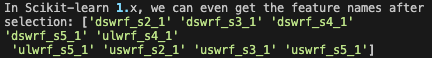  
En este gráfico podemos observar el comportamiento de RandomForest para distintas dimensionalidades, cogiendo un número creciente de atributos más relevantes:

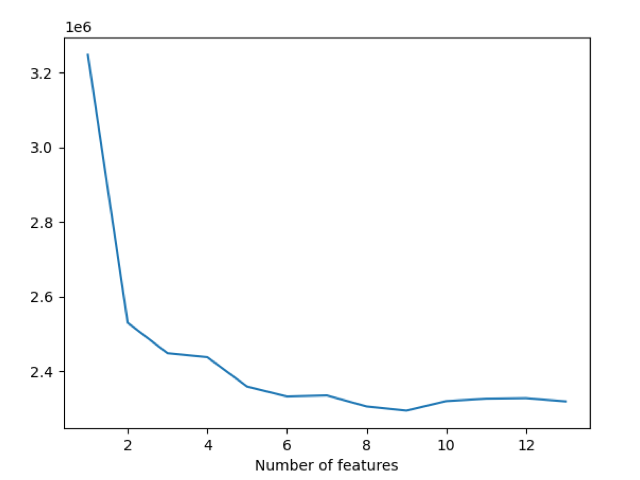

Sin embargo, decdimos realizar un segundo analisis con el dataframe que contiene las medias de cada variable para intentar sacar más atributos relevantes. En esta ejecución buscamos sacar los 5 atributos más relevantes, los cuales son: 'dswrf_s' 'tmp_sfc' 'ulwrf_sfc' 'ulwrf_tatm' 'uswrf_sfc'   . Esto se puede comprobar aquí: 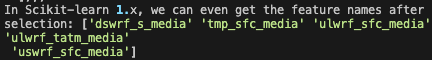

Como conclusión final, podemos observar que los cinco atributos más importantes incluyen todas las variables referentes a 'Upward longwave radiation' y 'Upward shortwave radiation'. Además la variable dswrf_sfc, la cual es la mejor predictora de la salida, obviamente está entre este grupo. Por último, tmp_sfc (temperatura de la superficie) completa este grupo de los cinco atributos más importantes.

## **Conclusiones**

Para estos métodos avanzados hemos observado mejoras respeto a los métodos básicos. Es importante recalcar que para este apartado hemos realizado varias ejecuciones con distintas cantidades de combianciones sin querer sobresaturar la ejecución, ya que los tiempos de entrenamiento son bastante superiores. Para comparar los errores utilizaremos el MAE.

Primero nos fijaremos en los resultados sin ajustar. Para SVM tenemos un error de aproximadamente 2.3 millones de unidades, lo cual es mejor que todos los modelos básicos salvo el de regresión lineal, que es ligeramente más preciso (aproximadamente 6% más preciso). En cuanto al tiempo de entrenamiento, es más lento que los métodos básicos salvo KNN que es ligéramente más lento (una diferencia minuscula y despreciable). 

Para RandomForest, encontramos que sin ajustar es ligeramente mejor que todos los métodos en general, aunque no observamos una diferencia muy significativa. En cuanto a tiempo de entrenamiento, es el más lento con diferencia, siendo el tiempo de entrenamiento mayor que 5 segundos cuando el resto no llegan al segundo de entrenamiento.

Sin embargo, RandomForest muestra su eficacia con los hiperparametros adecuados, tras hacer el ajuste de los mismos. Hemos limitado las combinaciones debido al alto tiempo de entrenamiento. Encintramos un error de aproximadamente 0.78 millones de unidades, mostrando un 141% de mejora en precisión respecto al mejor método ajustado global anterior (árboles de decisión). Este método muestra un ratio de 2.7 de mejora tras ser ajustado.

Por último, cabe mencionar que SVM apenas mejora con el ajuste de hiperparametros, mostrando un ratio de mejora de 1.044, siendo demasiado bajo y dejando a RandomForest como mejor método.